# Analytic Report on Health Facilities in Nigeria

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

import warnings

warnings.filterwarnings("ignore")

In [53]:
df = pd.read_excel('data/nigeria-hospitals-and-clinics_hxl.xlsx')
df.shape

(42064, 17)

In [54]:
df.head()

,state,lga,ward,uid,facility_code,facility_name,reg_number,start_date,ownership,facility_level,longitude,latitude,operation_status,registration_status,license_status,created,last_updated
0,#adm1+name\t,#adm2+name\t,#adm3+name\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\t#geo+lon,#geo+lat,NaN,NaN,NaN,NaN,NaN
1,Abia,Aba North,Ariaria,48319756.0,01/01/1/1/2/0001,Aba Holy Wounds Hospital,NaN,2003-10-05,Private,Secondary,7.34134,5.11445,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-05-16 09:46:23
2,Abia,Aba North,Umuola,47587317.0,01/01/1/1/2/0003,Alpha Inland Hospital,NaN,1985-04-02,Private,Secondary,7.385681,5.129272,Operational,Registered,Licensed,2018-01-01 01:01:01,2020-05-22 13:41:36
3,Abia,Aba North,Old GRA,38145837.0,01/01/1/1/2/0004,Angels of Mercy Hospital,NaN,2010-12-10,Private,Secondary,7.354919,5.124084,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-05-26 14:52:35
4,Abia,Aba North,Asa-Okpulor,37712654.0,01/01/1/1/1/0006,Asa-Okpulor II Health Centre,NaN,2010-04-08,Public,Primary,NaN,NaN,Operational,Registered,Licensed,2018-01-01 01:01:01,2020-05-22 14:28:24


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                42064 non-null  object 
 1   lga                  42064 non-null  object 
 2   ward                 42049 non-null  object 
 3   uid                  42063 non-null  float64
 4   facility_code        42063 non-null  object 
 5   facility_name        42063 non-null  object 
 6   reg_number           1735 non-null   object 
 7   start_date           34838 non-null  object 
 8   ownership            42063 non-null  object 
 9   facility_level       42063 non-null  object 
 10  longitude            37027 non-null  object 
 11  latitude             37070 non-null  object 
 12  operation_status     42063 non-null  object 
 13  registration_status  41806 non-null  object 
 14  license_status       41805 non-null  object 
 15  created              42063 non-null 

### Data Cleaning

In [56]:
#Drop the first Row
df = df.iloc[1:]

In [57]:
# Reset the index
df = df.reset_index(drop=True)

In [58]:
df.head()

,state,lga,ward,uid,facility_code,facility_name,reg_number,start_date,ownership,facility_level,longitude,latitude,operation_status,registration_status,license_status,created,last_updated
0,Abia,Aba North,Ariaria,48319756.0,01/01/1/1/2/0001,Aba Holy Wounds Hospital,NaN,2003-10-05,Private,Secondary,7.34134,5.11445,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-05-16 09:46:23
1,Abia,Aba North,Umuola,47587317.0,01/01/1/1/2/0003,Alpha Inland Hospital,NaN,1985-04-02,Private,Secondary,7.385681,5.129272,Operational,Registered,Licensed,2018-01-01 01:01:01,2020-05-22 13:41:36
2,Abia,Aba North,Old GRA,38145837.0,01/01/1/1/2/0004,Angels of Mercy Hospital,NaN,2010-12-10,Private,Secondary,7.354919,5.124084,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-05-26 14:52:35
3,Abia,Aba North,Asa-Okpulor,37712654.0,01/01/1/1/1/0006,Asa-Okpulor II Health Centre,NaN,2010-04-08,Public,Primary,NaN,NaN,Operational,Registered,Licensed,2018-01-01 01:01:01,2020-05-22 14:28:24
4,Abia,Aba North,Asaokpuaja,14064567.0,01/01/1/1/1/0004,Asaokpuaja Health Post,NaN,2012-12-05,Public,Primary,7.3741,5.0768,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-05-09 17:09:09


In [59]:
df.drop(['uid','reg_number', 'last_updated', 'created', 'start_date', 'facility_code'],axis = 1,inplace = True)

In [60]:
df['country'] = 'nigeria'

In [61]:
df.head()

,state,lga,ward,facility_name,ownership,facility_level,longitude,latitude,operation_status,registration_status,license_status,country
0,Abia,Aba North,Ariaria,Aba Holy Wounds Hospital,Private,Secondary,7.34134,5.11445,Operational,Registered,Licensed,nigeria
1,Abia,Aba North,Umuola,Alpha Inland Hospital,Private,Secondary,7.385681,5.129272,Operational,Registered,Licensed,nigeria
2,Abia,Aba North,Old GRA,Angels of Mercy Hospital,Private,Secondary,7.354919,5.124084,Operational,Registered,Licensed,nigeria
3,Abia,Aba North,Asa-Okpulor,Asa-Okpulor II Health Centre,Public,Primary,NaN,NaN,Operational,Registered,Licensed,nigeria
4,Abia,Aba North,Asaokpuaja,Asaokpuaja Health Post,Public,Primary,7.3741,5.0768,Operational,Registered,Licensed,nigeria


In [62]:
#Check For Duplicates
duplicates = df.duplicated()
duplicates.sum()

64

In [63]:
df = df.drop_duplicates()

In [64]:
#There is no duplicate in our dataset
duplicates = df.duplicated()
duplicates.sum()

0

In [65]:
df.isna().sum()

state                     0
lga                       0
ward                     15
facility_name             0
ownership                 0
facility_level            0
longitude              5034
latitude               4991
operation_status          0
registration_status     255
license_status          256
country                   0
dtype: int64

In [66]:
df = df.fillna(df.mode().iloc[0])

In [67]:
df.isna().sum()

state                  0
lga                    0
ward                   0
facility_name          0
ownership              0
facility_level         0
longitude              0
latitude               0
operation_status       0
registration_status    0
license_status         0
country                0
dtype: int64

#### Export the Clean Data

In [68]:
# Export current clean dataframe
df.to_csv("data/df_clean.csv" , index=False)

#### import the Clean Data

In [2]:
df = pd.read_csv("data/df_clean.csv")

### Exploratory Data Analysis

In [3]:
df['ownership'].unique()

array(['Private', 'Public'], dtype=object)

In [87]:
df['ownership'].value_counts()

Public     30734
Private    11265
Name: ownership, dtype: int64

<AxesSubplot:xlabel='ownership', ylabel='count'>

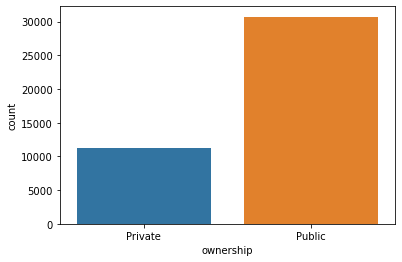

In [88]:
sns.countplot(x="ownership", data=df)

<AxesSubplot:ylabel='ownership'>

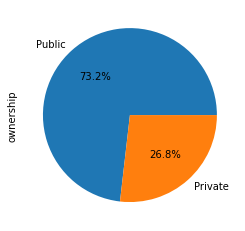

In [89]:
df['ownership'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [90]:
df['facility_level'].unique()

array(['Secondary', 'Primary', 'Tertiary'], dtype=object)

In [91]:
df['facility_level'].value_counts()

Primary      35858
Secondary     5983
Tertiary       158
Name: facility_level, dtype: int64

<AxesSubplot:xlabel='facility_level', ylabel='count'>

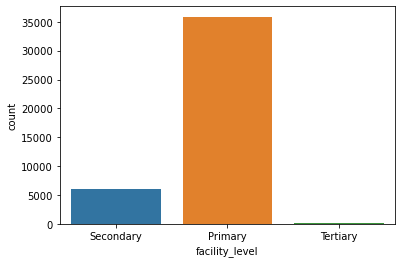

In [92]:
sns.countplot(x="facility_level", data=df)

<AxesSubplot:ylabel='facility_level'>

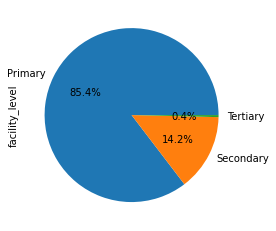

In [93]:
df['facility_level'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [94]:
df['operation_status'].unique()

array(['Operational', 'Pending Operation (Under Construction)',
       'Closed (Temporary)', 'Pending Operation (Construction Complete)',
       'Pending Operation', 'Closed'], dtype=object)

In [95]:
df['operation_status'].value_counts()

Operational                                  39966
Closed (Temporary)                            1154
Pending Operation                              296
Closed                                         287
Pending Operation (Construction Complete)      233
Pending Operation (Under Construction)          63
Name: operation_status, dtype: int64

<AxesSubplot:xlabel='operation_status', ylabel='count'>

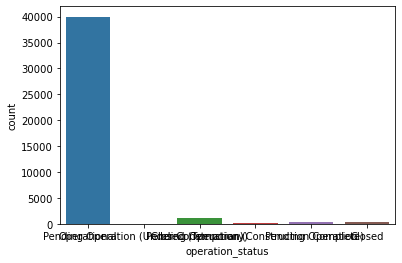

In [96]:
sns.countplot(x="operation_status", data=df)

<AxesSubplot:ylabel='operation_status'>

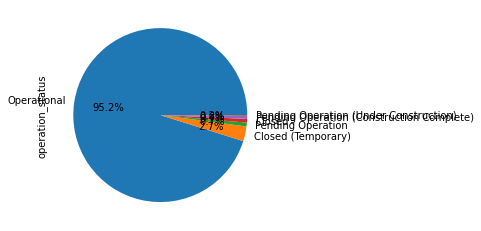

In [97]:
df['operation_status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [98]:
df['registration_status'].unique() 

array(['Registered', 'Unknown', 'Not Applicable',
       'Registration Suspended', 'Pending Registration',
       'Provisionally Registered', 'Registration Cancelled'], dtype=object)

In [99]:
df['registration_status'].value_counts()

Registered                  24539
Unknown                     13224
Not Applicable               3388
Pending Registration          515
Provisionally Registered      255
Registration Suspended         67
Registration Cancelled         11
Name: registration_status, dtype: int64

<AxesSubplot:xlabel='registration_status', ylabel='count'>

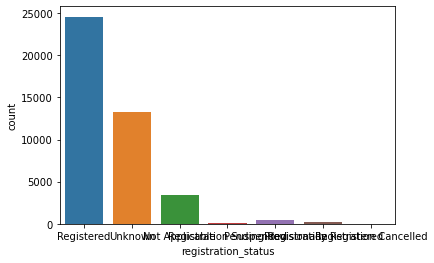

In [100]:
sns.countplot(x="registration_status", data=df)

<AxesSubplot:ylabel='registration_status'>

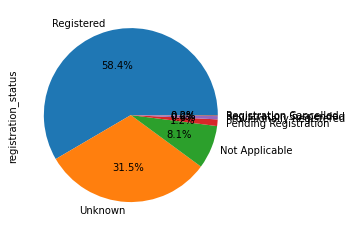

In [101]:
df['registration_status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [102]:
df['license_status'].unique() 

array(['Licensed', 'Unknown', 'Not Applicable', 'Not Licensed',
       'License Cancelled'], dtype=object)

In [103]:
df['license_status'].value_counts()

Licensed             23550
Unknown              14118
Not Applicable        3829
Not Licensed           488
License Cancelled       14
Name: license_status, dtype: int64

<AxesSubplot:xlabel='license_status', ylabel='count'>

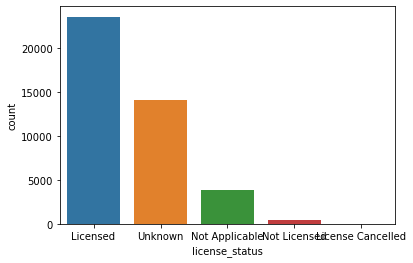

In [104]:
sns.countplot(x="license_status", data=df)

<AxesSubplot:ylabel='license_status'>

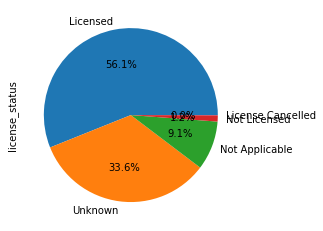

In [105]:
df['license_status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [70]:
df['state'].unique()

array(['Abia', 'Adamawa', 'Akwa-Ibom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'FCT', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano',
       'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger',
       'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto',
       'Taraba', 'Yobe', 'Zamfara'], dtype=object)

In [71]:
df['state'].value_counts()

Lagos          2369
Katsina        1994
Benue          1878
Niger          1612
Oyo            1568
Kaduna         1563
Kano           1562
Plateau        1490
Nasarawa       1389
Cross River    1294
Kogi           1273
Bauchi         1262
Ogun           1234
Abia           1229
Anambra        1227
Imo            1203
Adamawa        1151
Osun           1124
Edo            1115
Enugu          1082
Taraba         1044
Kwara          1033
Kebbi           999
Borno           888
Delta           863
Sokoto          848
Ebonyi          842
Ondo            834
Akwa-Ibom       828
Jigawa          799
Zamfara         781
FCT             770
Gombe           682
Yobe            673
Rivers          590
Ekiti           586
Bayelsa         320
Name: state, dtype: int64

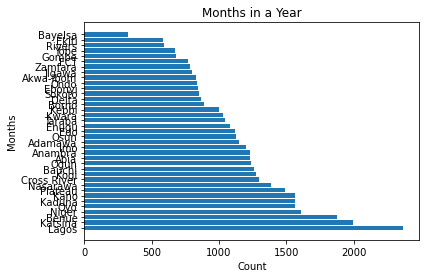

<Figure size 432x288 with 0 Axes>

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = df['state']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()


# Create the horizontal bar plot
plt.barh(category_counts.index, category_counts.values)[:5]

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Months')
plt.title('Months in a Year')

# Display the plot
plt.show()
plt.savefig("year_bar.png")

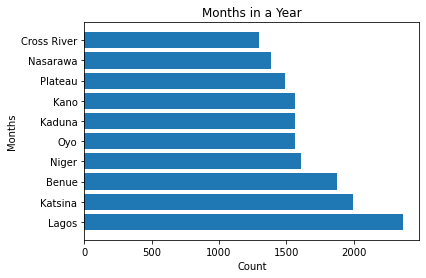

<Figure size 432x288 with 0 Axes>

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = df['state']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()[:10]


# Create the horizontal bar plot
plt.barh(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Months')
plt.title('Months in a Year')

# Display the plot
plt.show()
plt.savefig("year_bar.png")

<AxesSubplot:ylabel='state'>

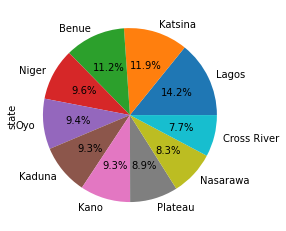

In [82]:
df['state'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%')

In [4]:
df.columns

Index(['state', 'lga', 'ward', 'facility_name', 'ownership', 'facility_level',
       'longitude', 'latitude', 'operation_status', 'registration_status',
       'license_status', 'country'],
      dtype='object')

In [9]:
df['license_status'].unique() 

array(['Licensed', 'Unknown', 'Not Applicable', 'Not Licensed',
       'License Cancelled'], dtype=object)

In [ ]:
df['ownership'].unique() 